In [7]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets



In [8]:

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)

df['target'] = iris.target_names[iris.target]
df.to_csv('data/iris.csv', index=False)
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.25)

model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(4,)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test) )


Epoch 1/10
2/2 [==============================] - 1s 194ms/step - loss: 1.1651 - accuracy: 0.3243 - val_loss: 1.1092 - val_accuracy: 0.6549
Epoch 2/10
2/2 [==============================] - 0s 40ms/step - loss: 1.0725 - accuracy: 0.7027 - val_loss: 1.0425 - val_accuracy: 0.1858
Epoch 3/10
2/2 [==============================] - 0s 50ms/step - loss: 1.0351 - accuracy: 0.2432 - val_loss: 1.0065 - val_accuracy: 0.3363
Epoch 4/10
2/2 [==============================] - 0s 43ms/step - loss: 1.0107 - accuracy: 0.2973 - val_loss: 0.9751 - val_accuracy: 0.3451
Epoch 5/10
2/2 [==============================] - 0s 38ms/step - loss: 0.9746 - accuracy: 0.2973 - val_loss: 0.9504 - val_accuracy: 0.4071
Epoch 6/10
2/2 [==============================] - 0s 37ms/step - loss: 0.9356 - accuracy: 0.4595 - val_loss: 0.9459 - val_accuracy: 0.6283
Epoch 7/10
2/2 [==============================] - 0s 37ms/step - loss: 0.9090 - accuracy: 0.6757 - val_loss: 0.9492 - val_accuracy: 0.6283
Epoch 8/10
2/2 [==========

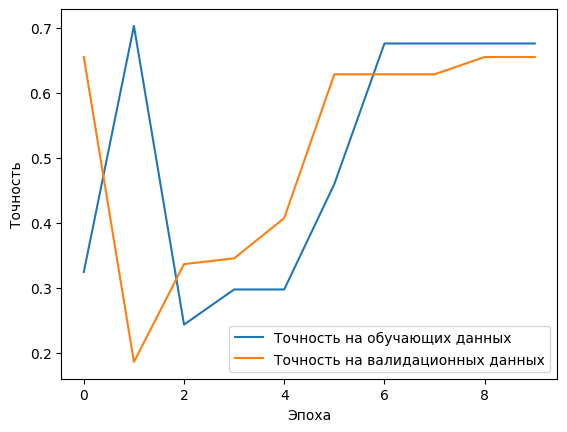

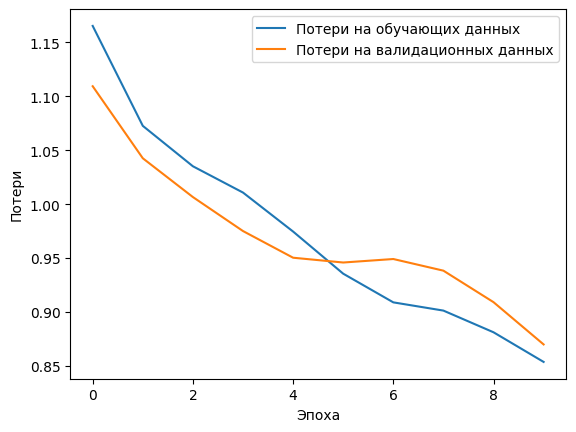

In [9]:

# Визуализация точности
plt.plot(history.history['accuracy'], label='Точность на обучающих данных')
plt.plot(history.history['val_accuracy'], label='Точность на валидационных данных')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

# Визуализация потерь
plt.plot(history.history['loss'], label='Потери на обучающих данных')
plt.plot(history.history['val_loss'], label='Потери на валидационных данных')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

In [10]:
import visualkeras
visualkeras.layered_view(model)

In [11]:
# Сохранение модели
model.save('models/my_model2.h5')

# Сохранение метрик в файл JSON
metrics_dict = {'accuracy': history.history['accuracy'],
                'val_accuracy': history.history['val_accuracy'],
                'loss': history.history['loss'],
                'val_loss': history.history['val_loss']}

import json

with open('metrics/metrics2.json', 'w') as json_file:
    json.dump(metrics_dict, json_file)